### $\color{royalblue}{\text{ Sedma vježba iz numeričkih metoda u astronomiji (NMA), datum: 5.12.2024.}} $

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from mpl_toolkits.mplot3d import Axes3D
import time

### $\color{magenta}{\text{1. NUMERIČKA INTEGRACIJA DIFERENCIJALNIH JEDNAČINA.}} $

Od ranije je poznato da je Tejlorovim redovima moguće funkciju aproksimirati pomoću polinoma, koristeći vrijednost funkcije i njenih izvoda

u određenoj tački:
#### $f(x+\Delta x)=f(x)+\Delta x\cdot f'(x)+\frac{1}{2}(\Delta x)^2\cdot f''(x)+...$
U Ojlerovoj metodi, pretpostavka je da je korak $\Delta x$ dovoljno mali tako da su doprinosi od viših izvoda zanemarljivi.

Dobar primjer su jednačine kretanja.
#### $\vec{r}(t+\Delta t)\approx\vec{r}(t)+\Delta t\cdot\vec{v}(t)$,
#### $\vec{v}(t+\Delta t)\approx\vec{v}(t)+\Delta t\cdot\vec{a}(t)$.
Poznavanjem položaja, brzine i ubrzanja u nekom trenutku vremena možemo da izračunamo njihove vrijednosti u nekom budućem

trenutku. Pretpostavka je da su poznati početni uslovi (položaj i brzina). Takođe, poznate su sile koje djeluju,

kao i masa, te je moguće izračunati ubrzanje.

Ispod je kod za kreiranje raznih korisnih konverzionih funkcija. Još važnije, data je funkcija koja računa

komponente ubrzanja nekog tijela koje je pod uticajem gravitacije Sunca i planete (potrebno nešto kasnije).

### 1.1. Ojlerova metoda.

In [2]:
def year2second(x): # konverzija godina u sekunde
    return x*31557600.0

def day2second(x): # konverzija dana u sekunde
    return x*86400

def second2day(x): # konverzija sekunda u dane
    return x/86400

def second2year(x): # konverzija sekunda u godine
    return x/31557600.0

def au2m(x): # konverzija astronomskih jedinica u metre
    return x*au

def m2au(x): # konverzija metara u astronomske jedinice
    return x/au

def ubrzanje_3tijela(x,y,z,xp,yp,zp,Ms,Mp, gama):
    
    # x,y,z - heliocentrične koordinate objekta
    # xp,yp,zp - heliocentrične koordinate planete
    # Ms - masa Sunca
    # Mp - masa planete
    # gama - gravitaciona konstanta
    
    x_pc=x-xp
    y_pc=y-yp
    z_pc=z-zp
    
    r=(x ** 2 + y ** 2 + z ** 2)**(1/2) # heliocentični radijus vektor objekta
    r_pc=(x_pc ** 2 + y_pc ** 2 + z_pc** 2)**(1/2) # planetocentrični radijus vektor objekta


    ax = -gama * (Ms / r**3 * x + Mp / r_pc**3 * x_pc)
    ay = -gama * (Ms / r**3 * y + Mp / r_pc**3 * y_pc)
    az = -gama * (Ms / r**3 * z + Mp / r_pc**3 * z_pc)
    
    return ax, ay, az

gm=1.32712440018e20 # gravitaciona konstanta * masa Sunca
au=149597870700.

#### Poželjno je eksperimentisati sa početnim uslovima. Npr. početi sa $x=1\,AJ$ dok su ostale

#### komponente položaja nula (slično i za brzine)... Ovdje je pak drukčije urađeno.

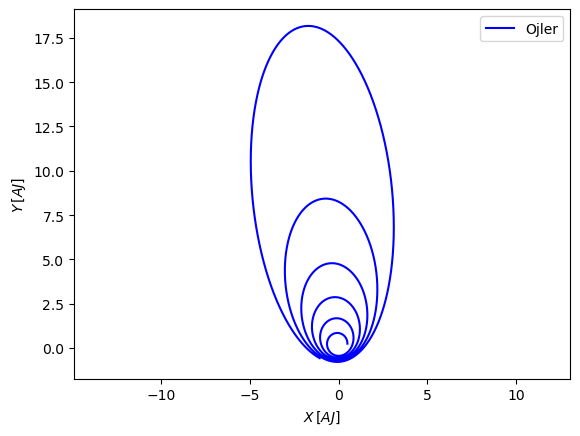

In [123]:
x=[au2m(0.5)] # početni položaji
y=[au2m(0.25)]
z=[0]

vx=[0] # početne brzine
vy=[4e4] 
vz=[1e4]

t=year2second(50) # parametri integracije
dt=day2second(1)

tt=0

while tt<t:
    
    r=np.sqrt(x[-1]**2+y[-1]**2+z[-1]**2) #trenutno heliocentrično rastojanje
    
    # komponente ubrzanja
    ax=-gm/r**3*x[-1]
    ay=-gm/r**3*y[-1]
    az=-gm/r**3*z[-1]
    
    # koordinate
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    z.append(z[-1]+vz[-1]*dt)
    
    # brzine
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    vz.append(vz[-1]+az*dt)
    
    # vrijeme
    tt=tt+dt
    
plt.plot(m2au(np.array(x)), m2au(np.array(y)),'b', label='Ojler')
plt.axis('equal')
plt.xlabel(r'$X\,[AJ]$')
plt.ylabel(r'$Y\,[AJ]$')
plt.legend()
plt.show()

#### Komentar: Ojlerova metoda može akumulirati grešku tokom duže simulacije, posebno kod orbita koje bi trebalo
#### da budu eliptične. Ta greška se može pojaviti kao "spiralni" odmak orbite.

### 1.2. Ojler-Kromerova metoda.
Modifikacija klasične Ojlerove metode, a glavna razlika je u redosljedu ažuriranja brzina i položaja.

Prvo se ažurira brzina, a položaj se računa iz ažurirane brzine, što daje stabilnije rješenje.
#### $\vec{v}(t+\Delta t)\approx\vec{v}(t)+\Delta t\cdot\vec{a}(t)$.
#### $\vec{r}(t+\Delta t)\approx\vec{r}(t)+\Delta t\cdot\vec{v}(t+\Delta t)$,

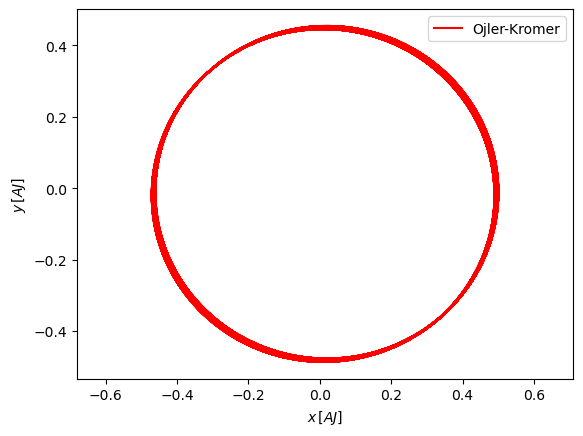

In [124]:
x=[au2m(0.5)] # #početni uslovi
y=[0.25]
z=[0]

vx=[0] # početne brzine
vy=[4e4]
vz=[1e4]

tt=0
dt=day2second(1)
while tt<t:
    
    r=np.sqrt(x[-1]**2+y[-1]**2+z[-1]**2) #trenutno heliocentrično rastojanje
    
    # komponente ubrzanja
    ax=-gm/r**3*x[-1]
    ay=-gm/r**3*y[-1]
    az=-gm/r**3*z[-1]
    
    # brzine
    vx.append(vx[-1]+ax*dt)
    vy.append(vy[-1]+ay*dt)
    vz.append(vz[-1]+az*dt)
    
    # koordinate
    x.append(x[-1]+vx[-1]*dt)
    y.append(y[-1]+vy[-1]*dt)
    z.append(z[-1]+vz[-1]*dt)
    
    # vrijeme
    tt=tt+dt
    
plt.plot(m2au(np.array(x)), m2au(np.array(y)),'r', label='Ojler-Kromer')
plt.axis('equal')
plt.legend()
plt.xlabel('$x\,[AJ]$')
plt.ylabel('$y\,[AJ]$')
plt.legend()
plt.show()

Ojlerova metoda je inferiorna u odnosu na Ojler-Kromerovu metodu jer je nestabilna za velike korake $\Delta t$

i akumulira greške u oscilatornim sistemima. Obje metode su jako jednostavne za primjenu.

### 1.3. Složeniji slučaj.
Sada imamo dva gravitaciona izvora – Sunce i Zemlju. Simulira se putanja tijela zanemarljive mase pod njihovim uticajem.

Uvedene su geocentrične koordinate za praćenje položaja tijela u odnosu na Zemlju ($x_{gc},\,y_{gc},\,z_{gc}$), 

dok su heliocentrične koordinate ($x_{hc},\,y_{hc},\,z_{hc}$) praćene u odnosu na Sunce.


In [132]:
Ms = 1.989e30 # masa Sunca
Mz = 5.972e24 # masa Zemlje
gama = 6.67e-11 # gravitaciona konstanta
r0z = 6.378e6  # poluprečnik Zemlje
v_zemlja = 2 * np.pi * au2m(1.) / (365.25 * 86400) # brzina Zemlje
v0 = 1e3 # početna brzina u odnosu na Zemlju

x_hc = [au2m(1.) + 50 * r0z] # 50 Zemljinih poluprečnika od Zemlje
y_hc = [0]
z_hc = [0]
vx_hc = 0
vy_hc = v_zemlja + v0 # heliocentrična brzina tijela
vz_hc = v0/2

print(x_hc)

[149916770700.0]


In [130]:
start = time.time()

xz = au2m(1) # koordinate Zemlje
yz = 0
zz = 0

sk = 2 * np.pi / year2second(1) # ugaona brzina kretanja Zemlje oko Sunca

x_gc = [x_hc[0] - xz] # geocentrične koordinate objekta
y_gc = [y_hc[0] - yz]
z_gc = [z_hc[0] - zz]

dt = day2second(1/24/6) # korak integracije
t = 0 # početno vrijeme

while t < year2second(1): # jedna godina (eksperimentisati)

    r_hc=(x_hc[-1] ** 2 + y_hc[-1] ** 2 + z_hc[-1] ** 2)**(1/2)
    r_gc=(x_gc[-1] ** 2 + y_gc[-1] ** 2 + z_gc[-1] ** 2)**(1/2)

    ax = -gama * (Ms / r_hc**3 * x_hc[-1] + Mz / r_gc**3 * x_gc[-1])
    ay = -gama * (Ms / r_hc**3 * y_hc[-1] + Mz / r_gc**3 * y_gc[-1])
    az = -gama * (Ms / r_hc**3 * z_hc[-1] + Mz / r_gc**3 * z_gc[-1])

    vx_hc += ax * dt
    vy_hc += ay * dt
    vz_hc += az * dt

    x_hc.append(x_hc[-1] + vx_hc * dt)
    y_hc.append(y_hc[-1] + vy_hc * dt)
    z_hc.append(z_hc[-1] + vz_hc * dt)

    lz = t * sk  # longituda Zemlje 

    # pravougle koordinate Zemlje
    xz = au2m(1.) * np.cos(lz)
    yz = au2m(1.) * np.sin(lz)

    # geocentrične koordinate objekta
    x_gc.append(x_hc[-1] - xz)
    y_gc.append(y_hc[-1] - yz)
    z_gc.append(z_hc[-1] - zz)
    
    t += dt

x_hc = np.array(x_hc)
y_hc = np.array(y_hc)
z_hc = np.array(z_hc)

x_gc = np.array(x_gc)
y_gc = np.array(y_gc)
z_gc = np.array(z_gc)

end = time.time()
print(f'Vrijeme izvršavanja za Ojler-Kromerovu metodu: {end - start:.2f} s.')

Vrijeme izvršavanja za Ojler-Kromerovu metodu: 0.42 s.


Dodatno pojašnjenje prije plotovanja:

Pretpostavlja se da Zemlja kruži oko Sunca po idealnoj kružnoj orbiti sa poluprečnikom od $1\,AJ$. Dakle, njen položaj se može predstaviti kao:

#### $x=r\cos{\theta},\,y=r\sin{\theta}$,

gdje je $\theta$ trenutna longituda koja se računa kao $\theta=t\cdot sk$, $sk=\frac{2\pi}{god}$, a $sk$ je ugaona brzina Zemlje oko Sunca,

jer Zemlja obiđe $2\pi$ radijana za jednu godinu. Takođe, ovdje se godina konvertuje u sekunde.

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(x_gc/r0z,y_gc/r0z,z_gc/r0z, color='g', label='Ojler-Kromer')
ax.set_xlabel(r'$X\,[R_{\oplus}]$')
ax.set_ylabel(r'$Y\,[R_{\oplus}]$')
ax.set_zlabel(r'$Z\,[R_{\oplus}]$')

#ax.set_xlim(-50, 50)
#ax.set_ylim(-50, 50)
#ax.set_zlim(-0.1, 0.1)

ax.zaxis.set_tick_params(labelsize=10, labelrotation=45)
plt.tight_layout()
plt.title('Geocentrični položaj tijela')
plt.legend()
plt.show()

### 1.4. Runge-Kutta metoda.
Da naglasimo, ovdje će biti primjena na složenijem slučaju - simulacija putanje tijela zanemraljive mase pod 

gravitacionim uticajem Sunca i Zemlje.

Rješava se jednačina:
#### $\frac{dy}{dt}=f(t,y)$.
Naravno, važe i jednakosti:
#### $dy=f(t,y)\cdot dt$, $\Delta y=f(t,y)\cdot\Delta t$.
Runge-Kutta metoda koristi procjene promjene funkcije (izvoda) unutar jednog koraka kako bi se odredio sljedeći položaj. Procjene su izvedene na početku,

sredini i kraju vremenskog koraka, što omogućava visok stepen preciznosti. Metoda aproksimira vrijednost $y(t+\Delta t)$ koristeći formulu:
#### $y_{n+1}=y_n+\frac{1}{6}(K_1+2K_2+2K_3+K_4)$,
gdje su koeficijenti $K_i$ procjene promjene funkcije u različitim tačkama unutar koraka.


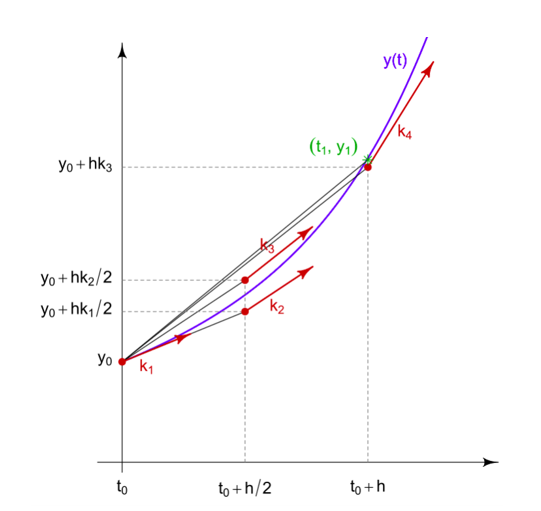

#### Koraci RK metode su:

1. korak (početna procjena stope promjene, pretpostavka je da je funkcija linearna, kao kod Ojlerove metode):

$K_1 = \Delta t \cdot f(t, y)$.

2. korak (procjena stope promjene na sredini intervala, koristeći $K_1$ - uzima se u obzir da je funkcija u toj tački već porasla sa stopom $K_1$):

$K_2 = \Delta t \cdot f\left(t + \frac{\Delta t}{2}, y + \frac{K_1}{2}\right)$.

3. korak (procjena stope promjene na sredini intervala, koristeći  $K_2$ - uzima se u obzir da je funkcija u toj tački već porasla sa stopom $K_2$):

$K_3 = \Delta t \cdot f\left(t + \frac{\Delta t}{2}, y + \frac{K_2}{2}\right)$.

4. korak (procjena stope promene na kraju intervala, koristeći $K_3$ - uzima se u obzir da je funkcija u toj tački već porasla sa stopom $K_3$):

$K_4 = \Delta t \cdot f(t + \Delta t, y + K_3)$.

Na kraju se iz dobijenih koeficijenata računa $y_{n+1}$.


#### Rješavanje sistema jednačina drugog reda Runge-Kutta metodom opisano je ispod:
$$
\ddot{x} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} x, 
$$

$$
\ddot{y} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} y, 
$$

$$
\ddot{z} = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} z, 
$$

$$
\dot{x} = v_x, \quad \dot{y} = v_y, \quad \dot{z} = v_z
$$

$$
\dot{v}_x = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} x, \quad 
\dot{v}_y = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} y, \quad 
\dot{v}_z = \frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} z
$$

$$
k_1 = \Delta t \cdot f(t, x)
$$

$$
k_{1(x)} = \Delta t \cdot f(v_x)
$$

$$
k_{1(v_x)} = \Delta t \cdot f(x, y, z)
$$

$$
k_{1(x)} = \Delta t \cdot v_x
$$

$$
k_{1(v_x)} = \Delta t \cdot \left(\frac{-\gamma M}{(x^2 + y^2 + z^2)^{\frac{3}{2}}} x \right)
$$


$$
k_2 = \Delta t \cdot f\left(t + \frac{\Delta t}{2}, x + \frac{k_1}{2}\right)
$$

$$
k_3 = \Delta t \cdot f\left(x + \frac{k_2}{2}\right)
$$

$$
k_4 = \Delta t \cdot f(x + k_3)
$$

$$
x_{n+1} = x_n + \frac{1}{6} \left( k_{1(x)} + 2k_{2(x)} + 2k_{3(x)} + k_{4(x)} \right)
$$

$$
v_{x(n+1)} = v_{x(n)} + \frac{1}{6} \left( k_{1(v_x)} + 2k_{2(v_x)} + 2k_{3(v_x)} + k_{4(v_x)} \right)
$$

In [133]:
start = time.time()

x = au2m(1.) + 50 * r0z # početni uslovi
y = 0
z = 0
vx = 0
vy = v_zemlja + v0
vz = v0/2

x_zemlja = au2m(1.)
y_zemlja = 0
z_zemlja = 0

sk = 2 * np.pi / year2second(1.)  # ugaona brzina Zemlje

t = 0.  # početno vrijeme
dt = day2second(1/24/6)  # korak integracije

x_rk = [x - x_zemlja] # čuvanje rezultata
y_rk = [y - y_zemlja]
z_rk = [z - z_zemlja]

vrijeme = [0]

while t < year2second(1): # jedna godina (eksperimentisati)

    # 1. korak
    ax, ay, az = ubrzanje_3tijela(x, y, z, x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_1 = dt * vx
    Ky_1 = dt * vy
    Kz_1 = dt * vz
    Kvx_1 = dt * ax
    Kvy_1 = dt * ay
    Kvz_1 = dt * az

    # 2. korak
    ax, ay, az = ubrzanje_3tijela(x + Kx_1 / 2, y + Ky_1 / 2, z + Kz_1 / 2,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_2 = dt * (vx + Kvx_1 / 2)
    Ky_2 = dt * (vy + Kvy_1 / 2)
    Kz_2 = dt * (vz + Kvz_1 / 2)
    Kvx_2 = dt * ax
    Kvy_2 = dt * ay
    Kvz_2 = dt * az

    # 3. korak
    ax, ay, az = ubrzanje_3tijela(x + Kx_2 / 2, y + Ky_2 / 2, z + Kz_2 / 2,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_3 = dt * (vx + Kvx_2 / 2)
    Ky_3 = dt * (vy + Kvy_2 / 2)
    Kz_3 = dt * (vz + Kvz_2 / 2)
    Kvx_3 = dt * ax
    Kvy_3 = dt * ay
    Kvz_3 = dt * az

    # 4. korak
    ax, ay, az = ubrzanje_3tijela(x + Kx_3, y + Ky_3, z + Kz_3,
                                x_zemlja, y_zemlja, z_zemlja, Ms, Mz, gama)
    Kx_4 = dt * (vx + Kvx_3)
    Ky_4 = dt * (vy + Kvy_3)
    Kz_4 = dt * (vz + Kvz_3)
    Kvx_4 = dt * ax
    Kvy_4 = dt * ay
    Kvz_4 = dt * az

    # ažuriranje pozicija i brzina
    x += (Kx_1 + 2 * Kx_2 + 2 * Kx_3 + Kx_4) / 6
    y += (Ky_1 + 2 * Ky_2 + 2 * Ky_3 + Ky_4) / 6
    z += (Kz_1 + 2 * Kz_2 + 2 * Kz_3 + Kz_4) / 6
    vx += (Kvx_1 + 2 * Kvx_2 + 2 * Kvx_3 + Kvx_4) / 6
    vy += (Kvy_1 + 2 * Kvy_2 + 2 * Kvy_3 + Kvy_4) / 6
    vz += (Kvz_1 + 2 * Kvz_2 + 2 * Kvz_3 + Kvz_4) / 6

    # ažuriranje položaja Zemlje
    t += dt
    x_zemlja = au2m(1.) * np.cos(sk * t)
    y_zemlja = au2m(1.) * np.sin(sk * t)

    # čuvanje geocentričnih koordinata
    x_rk.append(x - x_zemlja)
    y_rk.append(y - y_zemlja)
    z_rk.append(z - z_zemlja)
    vrijeme.append(t)
    
end = time.time()
print(f'Vrijeme izvršavanja za Runge-Kutta metodu: {end - start:.2f} s.')

Vrijeme izvršavanja za Runge-Kutta metodu: 1.31 s.


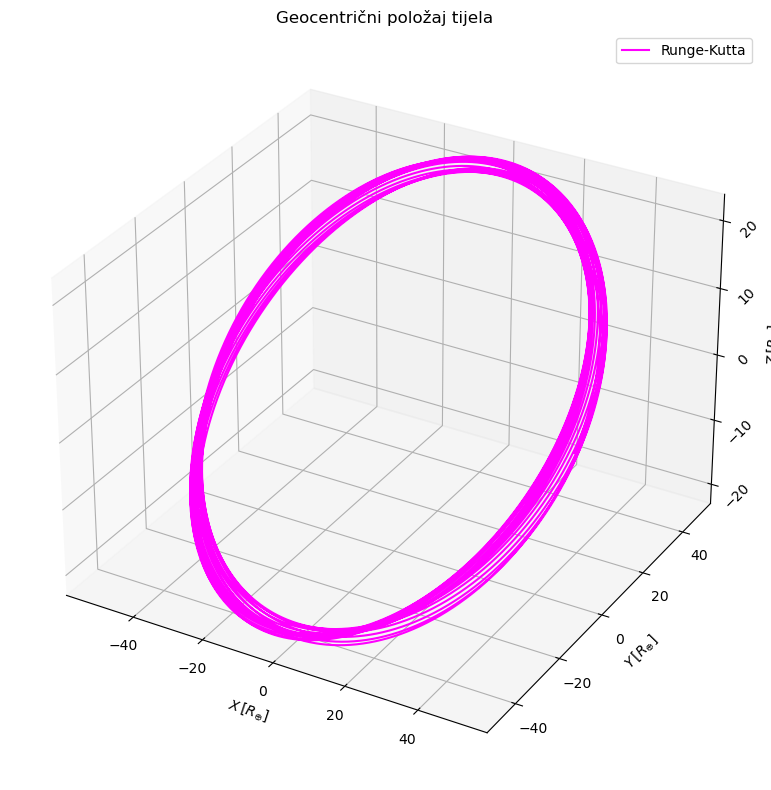

In [134]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(np.array(x_rk)/r0z, np.array(y_rk)/r0z, np.array(z_rk)/r0z, color='magenta',
        label='Runge-Kutta')

ax.zaxis.set_tick_params(labelsize=10, labelrotation=45)
ax.set_xlabel(r'$X\,[R_{\oplus}]$')
ax.set_ylabel(r'$Y\,[R_{\oplus}]$')
ax.set_zlabel(r'$Z\,[R_{\oplus}]$')
plt.title('Geocentrični položaj tijela')

plt.tight_layout()
plt.legend()
plt.show()

### 1.5. Upoređivanje Ojler-Kromerove i Runge-Kutta metode.

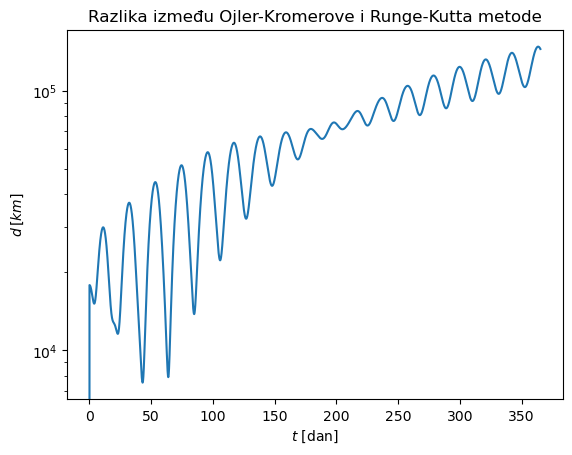

In [135]:
dx = np.array(x_rk) - x_gc
dy = np.array(y_rk) - y_gc
dz = np.array(z_rk) - z_gc

d = np.sqrt(dx**2 + dy**2 + dz**2)

plt.plot(second2day(np.array(vrijeme)), d/1000)
plt.yscale('log')
plt.xlabel(r'$t$ [dan]')
plt.ylabel(r'$d\,[km]$')
plt.title('Razlika između Ojler-Kromerove i Runge-Kutta metode')

plt.show()

#### Korisno je prikazati relativnu grešku:
#### $\varepsilon=\frac{d_{RK}-d_{OK}}{d_{RK}}$.

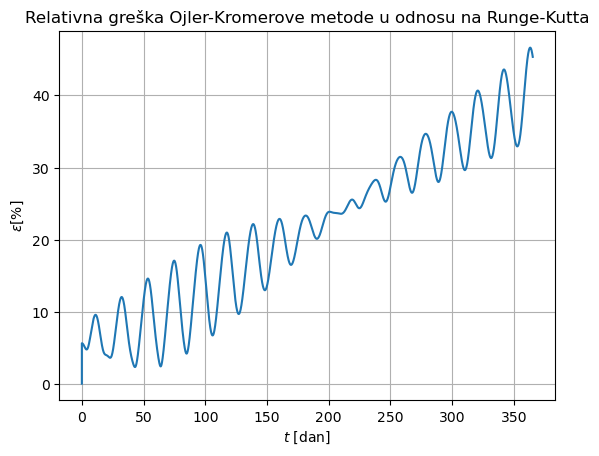

In [136]:
dx = np.array(x_rk) - np.array(x_gc) 
dy = np.array(y_rk) - np.array(y_gc)
dz = np.array(z_rk) - np.array(z_gc)

d = np.sqrt(dx**2 + dy**2 + dz**2)

relativna_greska = d / np.sqrt(np.array(x_rk)**2 + np.array(y_rk)**2 + np.array(z_rk)**2)

plt.plot(second2day(np.array(vrijeme)), relativna_greska * 100)  # Greška u %
plt.xlabel(r'$t$ [dan]')
plt.ylabel(r'$\varepsilon [\%]$')
plt.title('Relativna greška Ojler-Kromerove metode u odnosu na Runge-Kutta')
plt.grid()
plt.show()

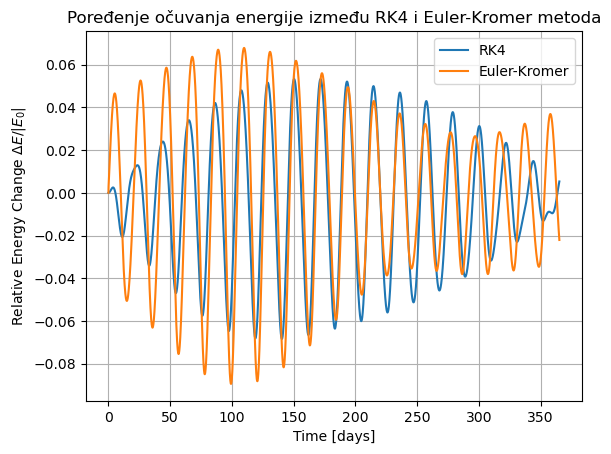

In [137]:
# Računanje ukupne energije za RK4
r_hc_rk = np.sqrt(np.array(x_rk)**2 + np.array(y_rk)**2 + np.array(z_rk)**2)  # Heliocentrična udaljenost
r_gc_rk = np.sqrt((np.array(x_rk) - x_zemlja)**2 + (np.array(y_rk) - y_zemlja)**2 + (np.array(z_rk) - z_zemlja)**2)  # Geocentrična udaljenost

v_rk_squared = np.array(vx)**2 + np.array(vy)**2 + np.array(vz)**2  # Kvadrat brzine

T_rk = 0.5 * v_rk_squared  # Kinetička energija (masa zanemarena)
U_rk = -gama * Ms / r_hc_rk - gama * Mz / r_gc_rk  # Potencijalna energija
E_rk = T_rk + U_rk  # Ukupna energija

# Računanje ukupne energije za Euler-Kromer
r_hc_ok = np.sqrt(np.array(x_gc)**2 + np.array(y_gc)**2 + np.array(z_gc)**2)  # Heliocentrična udaljenost
r_gc_ok = np.sqrt((np.array(x_gc) - x_zemlja)**2 + (np.array(y_gc) - y_zemlja)**2 + (np.array(z_gc) - z_zemlja)**2)  # Geocentrična udaljenost

v_ok_squared = np.array(vx_hc)**2 + np.array(vy_hc)**2 + np.array(vz_hc)**2  # Kvadrat brzine

T_ok = 0.5 * v_ok_squared  # Kinetička energija (masa zanemarena)
U_ok = -gama * Ms / r_hc_ok - gama * Mz / r_gc_ok  # Potencijalna energija
E_ok = T_ok + U_ok  # Ukupna energija

# Normalizovane energije u odnosu na početne vrednosti
E_rk_norm = (E_rk - E_rk[0]) / abs(E_rk[0])  # Relativna promena energije za RK4
E_ok_norm = (E_ok - E_ok[0]) / abs(E_ok[0])  # Relativna promena energije za Euler-Kromer

# Plotovanje promena energije
plt.plot(second2day(np.array(vreme)), E_rk_norm, label='RK4')
plt.plot(second2day(np.array(vreme)), E_ok_norm, label='Euler-Kromer')
plt.xlabel('Time [days]')
plt.ylabel(r'Relative Energy Change $\Delta E / |E_0|$')
plt.title('Poređenje očuvanja energije između RK4 i Euler-Kromer metoda')
plt.legend()
plt.grid()
plt.show()


### 1.4. Zaključak:
Ojlerova metoda je najjednostavnija metoda za rješavanje diferencijalnih jednačina, a veoma se lako implementira.

Korisna je u slučaju kad je potreban "grub" uvid u dinamiku sistema. Međutim, ima dosta nedostataka,

poput neočuvanja energije u konzervativnim sistemima. Položaj se računa na osnovu trenutne brzine, a ta brzina

nije korigovana efektima ubrzanja tokom cijelog koraka, pa se greška akumulira. Ojlerova metoda se pak,

može koristiti za sisteme koji nisu konzervativni (npr. gdje postoji prigušenje). Ojler-Kromerova metoda

bolje očuva konzervativne osobine sistema (energiju i ugaoni moment), a kod orbita, to znači da će tijelo

nastaviti da kruži oko Sunca ili Zemlje bez "spiralnog" napuštanja orbite.